## Import the libraries

In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
data = pd.read_csv('wine.csv')
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Standardizing the data

In [3]:
data_ss = scale(data)
data_ss

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## Normalizing the data

In [4]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_mm = mm.fit_transform(data)
data_mm

array([[0.        , 0.84210526, 0.1916996 , ..., 0.45528455, 0.97069597,
        0.56134094],
       [0.        , 0.57105263, 0.2055336 , ..., 0.46341463, 0.78021978,
        0.55064194],
       [0.        , 0.56052632, 0.3201581 , ..., 0.44715447, 0.6959707 ,
        0.64693295],
       ...,
       [1.        , 0.58947368, 0.69960474, ..., 0.08943089, 0.10622711,
        0.39728959],
       [1.        , 0.56315789, 0.36561265, ..., 0.09756098, 0.12820513,
        0.40085592],
       [1.        , 0.81578947, 0.66403162, ..., 0.10569106, 0.12087912,
        0.20114123]])

## Applying PCA and Agglomerative clustering on untransformed dataset

In [5]:
pca = PCA(n_components = 8)
pca_values = pca.fit_transform(data)
pca_values 

array([[ 3.18564055e+02,  2.14907729e+01,  3.16461306e+00, ...,
         5.20108716e-01, -5.90537491e-01, -2.12167411e-01],
       [ 3.03098514e+02, -5.36608268e+00,  6.81699246e+00, ...,
         5.24392343e-02,  8.21709609e-02,  6.14828557e-01],
       [ 4.38062063e+02, -6.53798613e+00, -1.06671672e+00, ...,
         6.34321618e-01,  7.93768027e-01, -4.27185415e-01],
       ...,
       [ 8.84563102e+01,  1.87796442e+01, -2.42312742e+00, ...,
         3.19367037e-01,  6.21932172e-01,  1.24379594e-01],
       [ 9.34544723e+01,  1.86741801e+01, -1.95877509e+00, ...,
        -1.01108089e+00,  4.15894621e-01, -1.28919114e-01],
       [-1.86944619e+02, -2.11062888e-01, -5.73392038e+00, ...,
         7.69306963e-01, -6.91677949e-01, -2.73443020e-01]])

In [6]:
#loadings or weights
pca.components_

array([[-1.55934284e-03,  1.65926191e-03, -6.81019030e-04,
         1.94905197e-04, -4.67130461e-03,  1.78679787e-02,
         9.89831553e-04,  1.56729290e-03, -1.23086954e-04,
         6.00609082e-04,  2.32712720e-03,  1.71381131e-04,
         7.04935892e-04,  9.99821721e-01],
       [ 2.77861762e-03,  1.20426744e-03,  2.15953126e-03,
         4.59399561e-03,  2.64607000e-02,  9.99339902e-01,
         8.74730944e-04, -5.86582556e-05, -1.35399415e-03,
         5.00222716e-03,  1.51142222e-02, -7.64042527e-04,
        -3.50068415e-03, -1.77693551e-02],
       [-1.00919962e-01, -1.83035443e-02, -1.24559463e-01,
        -5.12928854e-02, -9.28099861e-01,  2.99845440e-02,
         4.27611042e-02,  9.02671155e-02, -1.37215147e-02,
         2.62371281e-02, -3.03202978e-01,  2.69922728e-02,
         7.43661999e-02, -4.62655971e-03],
       [-1.47645845e-01, -1.36988601e-01, -1.56739376e-01,
         1.20471220e-02,  3.56990103e-01,  4.75411673e-03,
         7.64520642e-02,  1.72191025e-01, -1.

In [7]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([9.98087625e-01, 1.73591851e-03, 9.58948998e-05, 5.13200714e-05,
       1.29365230e-05, 8.73476385e-06, 2.88762342e-06, 1.56228669e-06])

In [8]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 99.81,  99.98,  99.99, 100.  , 100.  , 100.  , 100.  , 100.  ])

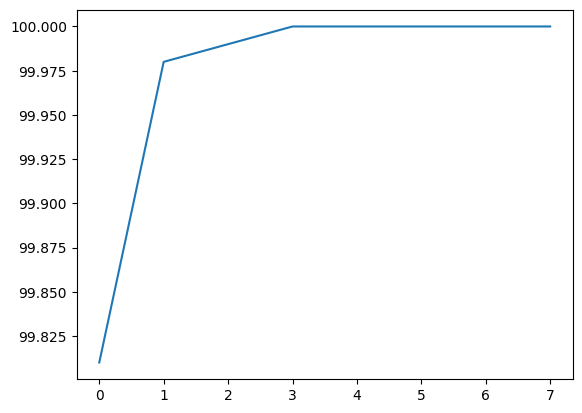

In [9]:
# Variance plot for PCA components obtained 
#plot(var1,color="red")
plt.plot(var1)

In [10]:
finalDf = pd.DataFrame(pca_values[:, 0:3])
finalDf

,0,1,2
0,318.564055,21.490773,3.164613
1,303.098514,-5.366083,6.816992
2,438.062063,-6.537986,-1.066717
3,733.240711,0.193320,-0.938312
4,-11.569952,18.487255,-0.424917
...,...,...,...
173,-6.981858,-4.538116,-2.625187
174,3.129945,2.338236,-4.423240
175,88.456310,18.779644,-2.423127
176,93.454472,18.674180,-1.958775


## Finding optimal number of clusters

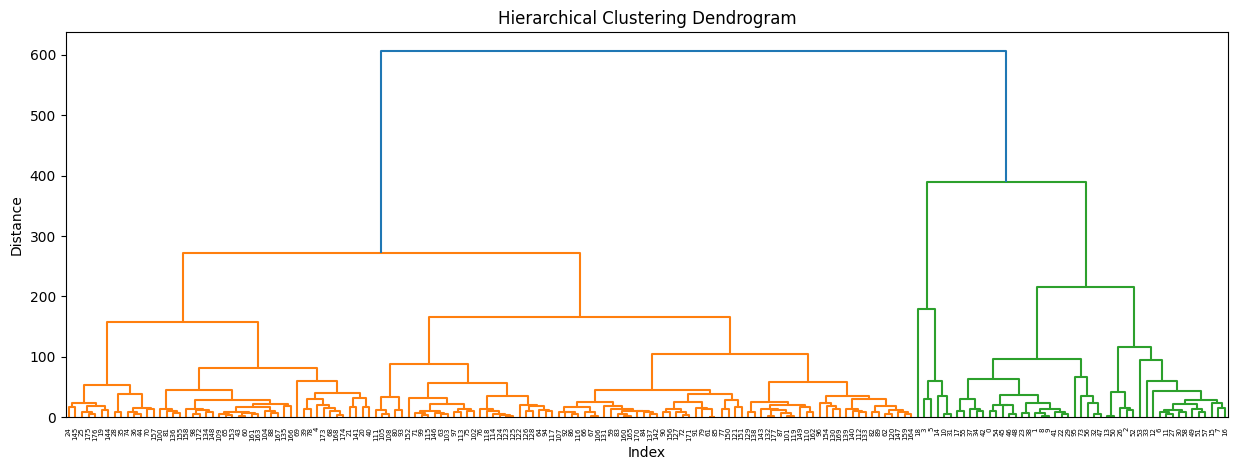

In [11]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(finalDf, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()  

## Fitting the model

In [12]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(finalDf) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
finalDf['Clusters']=cluster_labels # creating a  new column and assigning it to new column 
finalDf  

,0,1,2,Clusters
0,318.564055,21.490773,3.164613,1
1,303.098514,-5.366083,6.816992,1
2,438.062063,-6.537986,-1.066717,1
3,733.240711,0.193320,-0.938312,2
4,-11.569952,18.487255,-0.424917,0
...,...,...,...,...
173,-6.981858,-4.538116,-2.625187,0
174,3.129945,2.338236,-4.423240,0
175,88.456310,18.779644,-2.423127,0
176,93.454472,18.674180,-1.958775,0


In [13]:
finalDf.columns = ['pca1', 'pca2', 'pca3', 'Clusters']

In [14]:
finalDf

,pca1,pca2,pca3,Clusters
0,318.564055,21.490773,3.164613,1
1,303.098514,-5.366083,6.816992,1
2,438.062063,-6.537986,-1.066717,1
3,733.240711,0.193320,-0.938312,2
4,-11.569952,18.487255,-0.424917,0
...,...,...,...,...
173,-6.981858,-4.538116,-2.625187,0
174,3.129945,2.338236,-4.423240,0
175,88.456310,18.779644,-2.423127,0
176,93.454472,18.674180,-1.958775,0


In [15]:
plt.style.use(['classic']) 
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using Agglomerative')

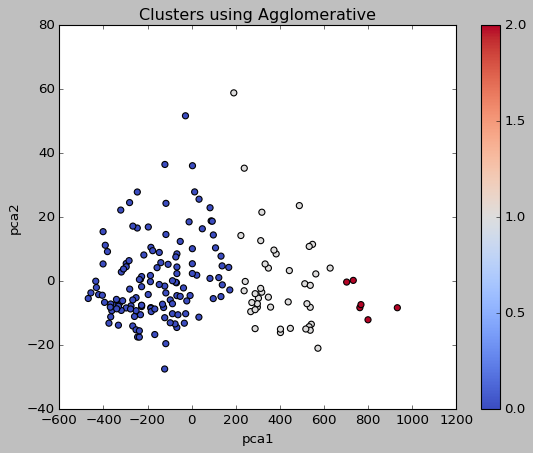

In [16]:
finalDf.plot(x="pca1",y ="pca2",c=cluster_labels,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Agglomerative') 

## Apply PCA and Agglomerative Clustering on the normalized dataset

In [17]:
pca_norm = PCA(n_components = 8)
pca_norm_values = pca_norm.fit_transform(data_mm)
pca_norm_values

array([[-0.84760416, -0.24314632,  0.02975173, ...,  0.03880984,
         0.04914587,  0.1141269 ],
       [-0.6786508 , -0.00571174, -0.28396974, ..., -0.02610397,
        -0.01303162, -0.13504289],
       [-0.70037223, -0.18386807,  0.19745712, ..., -0.04405415,
         0.14118661, -0.08672555],
       ...,
       [ 0.82065832, -0.55246914, -0.02074951, ...,  0.02190653,
         0.1936336 , -0.03695684],
       [ 0.77726837, -0.4302553 , -0.09551105, ..., -0.04478047,
         0.16155678, -0.06420208],
       [ 0.8758746 , -0.52183358,  0.28745683, ..., -0.10074274,
        -0.10993315,  0.12191245]])

In [18]:
#loadings or weights
pca_norm.components_

array([[ 0.6293282 , -0.11538334,  0.18694541, -0.00605884,  0.14898351,
        -0.06546653, -0.29907772, -0.32479936,  0.23920701, -0.18419798,
         0.08078851, -0.20189805, -0.37170465, -0.2400427 ],
       [ 0.01993018, -0.54791647, -0.2344791 , -0.16351603,  0.07620456,
        -0.18485315, -0.06219328,  0.01015402, -0.02206778, -0.02268177,
        -0.52014852,  0.24253447,  0.22768572, -0.43761144],
       [ 0.03341574, -0.08752348,  0.49369469,  0.39251169,  0.47666736,
         0.01701346,  0.26790425,  0.20701857,  0.23278396,  0.24925826,
        -0.02422129, -0.1201589 ,  0.30702977, -0.16025723],
       [-0.29258342,  0.06222583, -0.17547483,  0.20681556,  0.04089069,
        -0.11406464, -0.10022125, -0.07451451,  0.79752561, -0.22126034,
        -0.08760114,  0.27479592, -0.08399171,  0.17729834],
       [ 0.28148105, -0.16228821, -0.66493451,  0.23497092,  0.28992581,
         0.27654331,  0.20490882,  0.12531803,  0.0069295 ,  0.25398196,
         0.27044136,  0.11

In [19]:
# The amount of variance that each PCA explains is 
var_norm = pca_norm.explained_variance_ratio_
var_norm

array([0.51003634, 0.14853339, 0.06702619, 0.06257153, 0.05009893,
       0.03837954, 0.02882988, 0.01963591])

In [20]:
# Cumulative variance 
var1_norm = np.cumsum(np.round(var_norm,decimals = 4)*100)
var1_norm

array([51.  , 65.85, 72.55, 78.81, 83.82, 87.66, 90.54, 92.5 ])

#### To get some meaningful data we need to consider till the 8th principal component in this case. But since it is asked for only 3 components I am doing for both 3 components and also 8 components.

In [21]:
finalDf_norm_3 = pd.DataFrame(pca_norm_values[:, 0:3])
finalDf_norm_3.columns = ['pca1', 'pca2', 'pca3']
finalDf_norm_3

,pca1,pca2,pca3
0,-0.847604,-0.243146,0.029752
1,-0.678651,-0.005712,-0.283970
2,-0.700372,-0.183868,0.197457
3,-0.936076,-0.566967,0.093919
4,-0.454077,-0.063348,0.286092
...,...,...,...
173,0.898916,-0.482112,0.203259
174,0.785427,-0.353231,0.088418
175,0.820658,-0.552469,-0.020750
176,0.777268,-0.430255,-0.095511


In [22]:
finalDf_norm_8 = pd.DataFrame(pca_norm_values[:, 0:9])
finalDf_norm_8.columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8']
finalDf_norm_8

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
0,-0.847604,-0.243146,0.029752,-0.047430,-0.002728,0.038810,0.049146,0.114127
1,-0.678651,-0.005712,-0.283970,0.001458,-0.248171,-0.026104,-0.013032,-0.135043
2,-0.700372,-0.183868,0.197457,0.004297,0.049228,-0.044054,0.141187,-0.086726
3,-0.936076,-0.566967,0.093919,-0.110809,0.092336,-0.106658,-0.071420,-0.093214
4,-0.454077,-0.063348,0.286092,0.179782,0.008012,0.182285,0.067237,-0.035410
...,...,...,...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,0.012476,-0.342452,-0.032776,0.066883,0.070463
174,0.785427,-0.353231,0.088418,-0.075360,0.008066,0.043131,0.044505,0.067033
175,0.820658,-0.552469,-0.020750,-0.166405,-0.015765,0.021907,0.193634,-0.036957
176,0.777268,-0.430255,-0.095511,0.051361,0.215166,-0.044780,0.161557,-0.064202


### Agglomerative for normalized data and 3 principal components

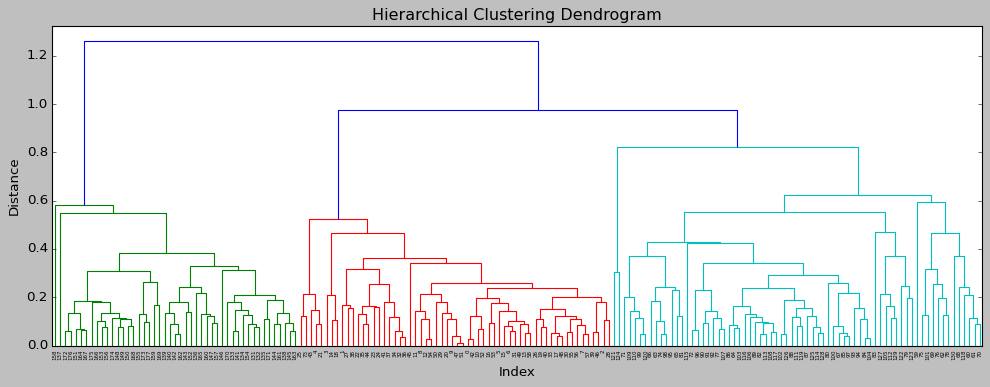

In [23]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(finalDf_norm_3, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()    

In [24]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(finalDf_norm_3) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
finalDf_norm_3['Clusters']=cluster_labels # creating a  new column and assigning it to new column 
finalDf_norm_3  

,pca1,pca2,pca3,Clusters
0,-0.847604,-0.243146,0.029752,2
1,-0.678651,-0.005712,-0.283970,2
2,-0.700372,-0.183868,0.197457,2
3,-0.936076,-0.566967,0.093919,2
4,-0.454077,-0.063348,0.286092,2
...,...,...,...,...
173,0.898916,-0.482112,0.203259,1
174,0.785427,-0.353231,0.088418,1
175,0.820658,-0.552469,-0.020750,1
176,0.777268,-0.430255,-0.095511,1


Text(0.5, 1.0, 'Clusters using Agglomerative')

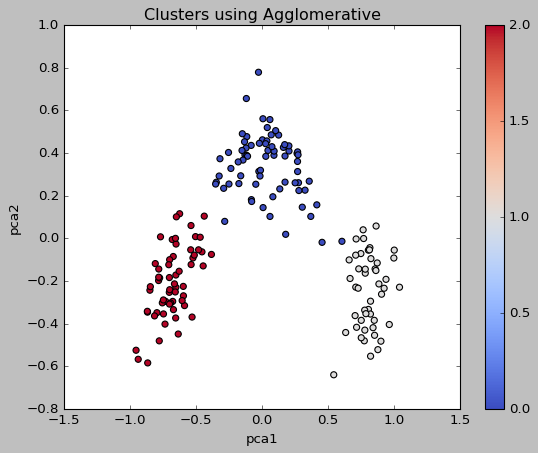

In [25]:
finalDf_norm_3.plot(x="pca1",y ="pca2",c=cluster_labels,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Agglomerative') 

### Agglomerative for normalized data and 8 principal components

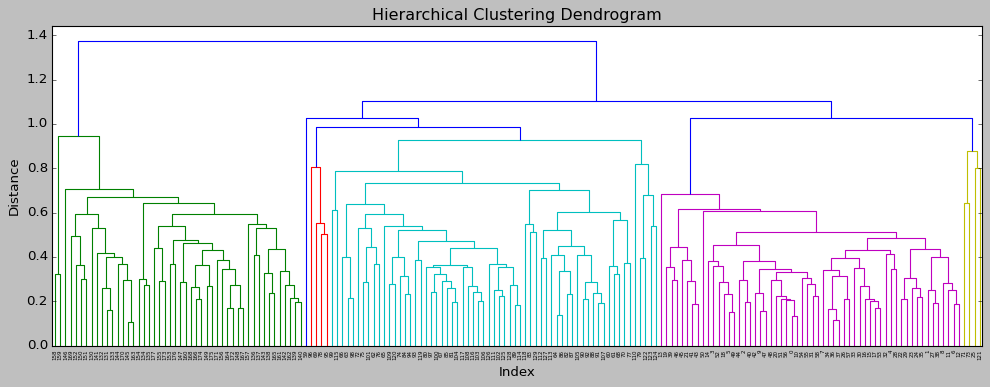

In [26]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(finalDf_norm_8, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()      

In [27]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(finalDf_norm_8) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
finalDf_norm_8['Clusters']=cluster_labels # creating a  new column and assigning it to new column 
finalDf_norm_8  

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,Clusters
0,-0.847604,-0.243146,0.029752,-0.047430,-0.002728,0.038810,0.049146,0.114127,0
1,-0.678651,-0.005712,-0.283970,0.001458,-0.248171,-0.026104,-0.013032,-0.135043,0
2,-0.700372,-0.183868,0.197457,0.004297,0.049228,-0.044054,0.141187,-0.086726,0
3,-0.936076,-0.566967,0.093919,-0.110809,0.092336,-0.106658,-0.071420,-0.093214,0
4,-0.454077,-0.063348,0.286092,0.179782,0.008012,0.182285,0.067237,-0.035410,0
...,...,...,...,...,...,...,...,...,...
173,0.898916,-0.482112,0.203259,0.012476,-0.342452,-0.032776,0.066883,0.070463,1
174,0.785427,-0.353231,0.088418,-0.075360,0.008066,0.043131,0.044505,0.067033,1
175,0.820658,-0.552469,-0.020750,-0.166405,-0.015765,0.021907,0.193634,-0.036957,1
176,0.777268,-0.430255,-0.095511,0.051361,0.215166,-0.044780,0.161557,-0.064202,1


Text(0.5, 1.0, 'Clusters using Agglomerative')

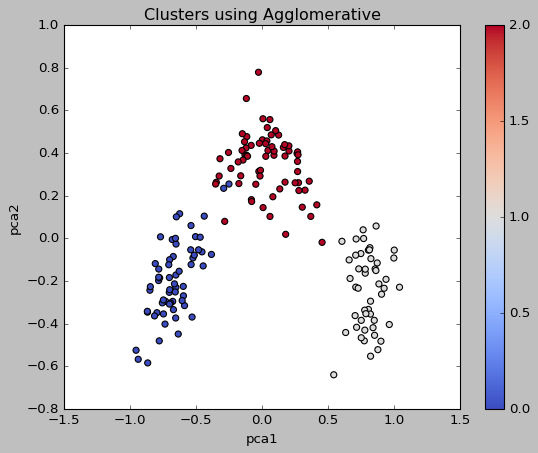

In [28]:
finalDf_norm_8.plot(x="pca1",y ="pca2",c=cluster_labels,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Agglomerative') 

#### No noticeable differences in clustering when checked with 3 and 8 principal components.

## Apply PCA and Agglomerative clustering on the Standardized data

In [29]:
pca_ss = PCA(n_components = 8)
pca_ss_values = pca_ss.fit_transform(data_ss)
pca_ss_values

array([[-3.5229339 , -1.45309844, -0.16479549, ..., -0.30071618,
         0.57387557,  0.05563728],
       [-2.52885806,  0.33001925, -2.02670665, ..., -0.88430941,
        -0.02971648,  1.01037189],
       [-2.78502898, -1.03693595,  0.9832377 , ...,  0.46884161,
         0.4883054 , -0.26895705],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304, ...,  0.00529036,
         0.73302611,  0.05254455],
       [ 2.75522166, -2.29378408, -0.55047368, ...,  1.01256231,
         0.75542325,  0.42651198],
       [ 3.49633565, -2.76060799,  1.01315115, ...,  0.37722337,
         0.01530664, -0.32500213]])

In [30]:
#loadings or weights
pca_ss.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [31]:
# The amount of variance that each PCA explains is 
var_ss = pca_ss.explained_variance_ratio_
var_ss

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244])

In [32]:
# Cumulative variance 
var1_ss = np.cumsum(np.round(var_ss,decimals = 4)*100)
var1_ss

array([39.54, 57.38, 67.71, 74.34, 80.61, 85.42, 89.38, 91.88])

#### Just like above I am doing for 3 principal components and 8 principal components

In [33]:
finalDf_ss_3 = pd.DataFrame(pca_ss_values[:, 0:3])
finalDf_ss_3.columns = ['pca1', 'pca2', 'pca3']
finalDf_ss_3

,pca1,pca2,pca3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


In [34]:
finalDf_ss_8 = pd.DataFrame(pca_ss_values[:, 0:9])
finalDf_ss_8.columns = ['pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7', 'pca8']
finalDf_ss_8

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937
...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512


### Agglomerative for standardized data and with 3 principal components

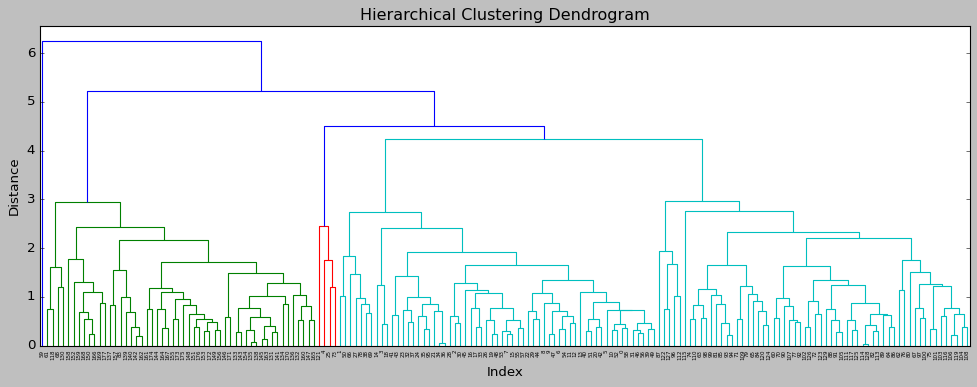

In [35]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(finalDf_ss_3, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()  

In [36]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(finalDf_ss_3) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
finalDf_ss_3['Clusters']=cluster_labels # creating a  new column and assigning it to new column 
finalDf_ss_3  

,pca1,pca2,pca3,Clusters
0,-3.522934,-1.453098,-0.164795,0
1,-2.528858,0.330019,-2.026707,0
2,-2.785029,-1.036936,0.983238,0
3,-3.922588,-2.768210,-0.174968,0
4,-1.407511,-0.867773,2.025829,0
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,2
174,2.942729,-1.752263,0.207480,2
175,3.027272,-2.756040,-0.940803,2
176,2.755222,-2.293784,-0.550474,2


Text(0.5, 1.0, 'Clusters using Agglomerative')

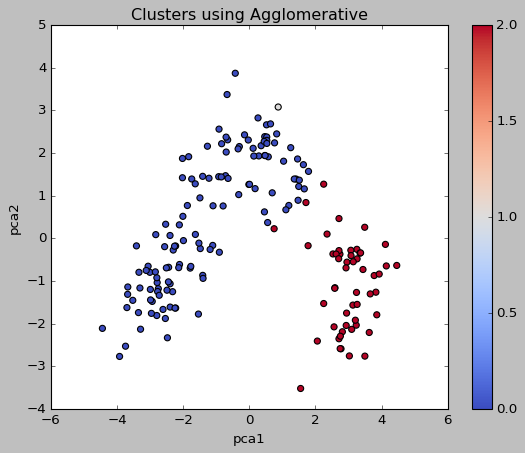

In [37]:
finalDf_ss_3.plot(x="pca1",y ="pca2",c=cluster_labels,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Agglomerative') 

### Agglomerative on the Standardized data and 8 principal components

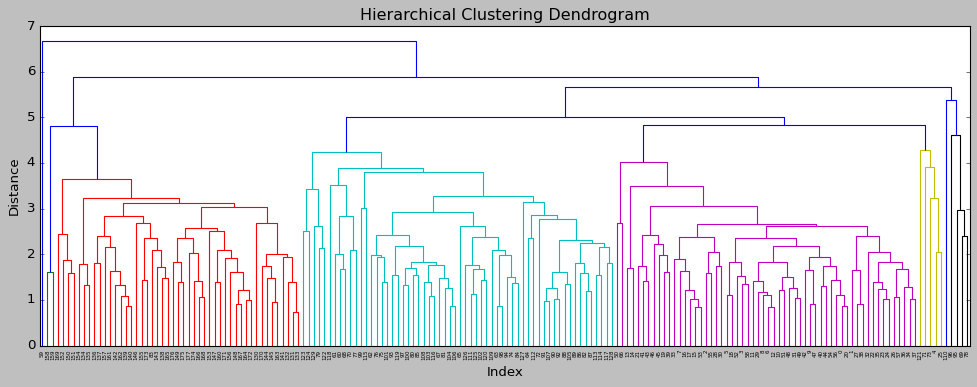

In [38]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(finalDf_ss_8, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()

In [39]:
from sklearn.cluster import AgglomerativeClustering 
import warnings 
warnings.filterwarnings('ignore')
h_complete = AgglomerativeClustering(n_clusters=3, linkage='average',affinity = "euclidean").fit(finalDf_ss_8) 

cluster_labels=pd.Series(h_complete.labels_)
cluster_labels
finalDf_ss_8['Clusters']=cluster_labels # creating a  new column and assigning it to new column 
finalDf_ss_8  

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,Clusters
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,-0.300716,0.573876,0.055637,0
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,-0.884309,-0.029716,1.010372,0
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,0.468842,0.488305,-0.268957,0
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,0.262616,-0.398364,0.618844,0
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,-0.593762,0.447876,0.434937,0
...,...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,-1.143155,0.843455,-0.206626,2
174,2.942729,-1.752263,0.207480,0.399381,0.154223,-0.062465,0.139947,-0.565588,2
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,0.005290,0.733026,0.052545,2
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,1.012562,0.755423,0.426512,2


Text(0.5, 1.0, 'Clusters using Agglomerative')

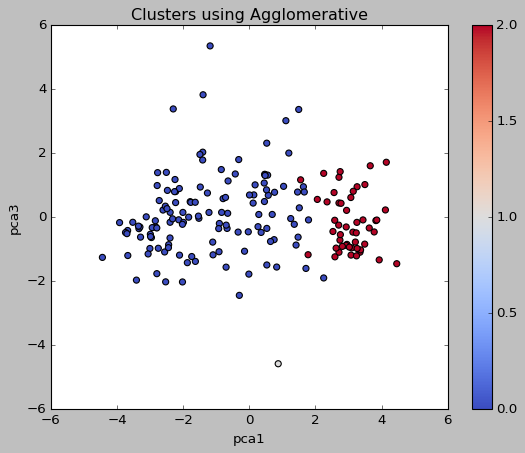

In [40]:
finalDf_ss_8.plot(x="pca1",y ="pca3",c=cluster_labels,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using Agglomerative') 

In [41]:
import sklearn

In [42]:
pca_ss_values

array([[-3.5229339 , -1.45309844, -0.16479549, ..., -0.30071618,
         0.57387557,  0.05563728],
       [-2.52885806,  0.33001925, -2.02670665, ..., -0.88430941,
        -0.02971648,  1.01037189],
       [-2.78502898, -1.03693595,  0.9832377 , ...,  0.46884161,
         0.4883054 , -0.26895705],
       ...,
       [ 3.02727243, -2.75604024, -0.94080304, ...,  0.00529036,
         0.73302611,  0.05254455],
       [ 2.75522166, -2.29378408, -0.55047368, ...,  1.01256231,
         0.75542325,  0.42651198],
       [ 3.49633565, -2.76060799,  1.01315115, ...,  0.37722337,
         0.01530664, -0.32500213]])

## Performance of the clustering using the Silhouette score

#### For standardized data with 3 principal components

In [43]:
sklearn.metrics.silhouette_score(pca_ss_values[:, 0:3], finalDf_ss_3.iloc[:, -1])

0.4117625953840383

#### For standardized data with 8 principal components

In [44]:
sklearn.metrics.silhouette_score(pca_ss_values[:, :], finalDf_ss_8.iloc[:, -1])

0.29899210423833034

#### For normalized data with 3 principal components

In [45]:
sklearn.metrics.silhouette_score(pca_norm_values[:, 0:3], finalDf_norm_3.iloc[:, -1])

0.5673677512398142

#### For normalized data with 8 principal components

In [46]:
sklearn.metrics.silhouette_score(pca_norm_values[:, :], finalDf_norm_8.iloc[:, -1])

0.406719964297668

#### For the original data with 3 principal components

In [47]:
sklearn.metrics.silhouette_score(pca_values[:, 0:3], finalDf.iloc[:, -1])

0.6102590879195431

**The Silhouette score for the dataset with no transformations and with 3 principal components is the highest.**